<a href="https://colab.research.google.com/github/kahiga2244/week-6/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_05_31_JOSEPH_NDEGWA_DATA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

### a) Specifying the Question

I have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

b) Defining the Metric for Success

c) Understanding the context

d) Recording the Experimental Design

e) Data Relevance

# 2. Reading the Data

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [0]:
# Loading the Dataset 1
# 
fifa = pd.read_csv('/content/fifa_ranking.csv')


In [0]:
#loading the Dataset 2
#
results = pd.read_csv('/content/results.csv')

In [0]:
#merging the datasets
df = pd.concat([fifa,results], axis=1,sort= True)

# 3. Checking the Data

In [71]:
# Determining the no. of records in our dataset
#size
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 57793 rows, and 25 columns


In [72]:
# Previewing the top of our dataset
#
df.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False


In [73]:
# Previewing the bottom of our dataset
# 
df.tail(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57793 entries, 0 to 57792
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [0]:
# Drop irrelevant data

df.drop(['rank_date','date','confederation','country_full','last_year_avg','last_year_avg_weighted'],1, inplace=True)

In [76]:
df = df.rename({'rank': 'home_team_rank'}, axis = 1)
df.head(1)

,home_team_rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False


In [0]:
# Replace missing values with a number
df.fillna(df.mean(), inplace=True)

In [0]:
	date	home_team	away_team	home_score	away_score	tournament	country	neutral	Year	month	rank	confederation	rank_date

In [12]:
df.head(1)

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False


# 4. External Data Source Validation

a) Validation

# 5. Tidying the Dataset

In [0]:
#checking the outliers
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [14]:
#checking the anomalies 
for col_val in df:
    rows, columns = df.shape
    percent_coefficient = float(1000 / rows)
    outliers = detect_outlier(df[col_val])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col_val} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

rank has 0 outliers in total, which is 0.0% of data


TypeError: ignored

In [15]:
## Identifying the Missing Data
#
df.isnull().sum()

rank                           0
country_abrv                   0
total_points                   0
previous_points                0
rank_change                    0
cur_year_avg                   0
cur_year_avg_weighted          0
two_year_ago_avg               0
two_year_ago_weighted          0
three_year_ago_avg             0
three_year_ago_weighted        0
confederation                  0
date                       16954
home_team                  16954
away_team                  16954
home_score                 16954
away_score                 16954
tournament                 16954
city                       16954
country                    16954
neutral                    16954
dtype: int64

In [77]:
# Dealing with the Missing Data
#
df.dropna().head(1)

,home_team_rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False


In [78]:
df.fillna(0).head(1)

,home_team_rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False


changing categorical values

In [79]:
def tournament(GAMES):
    if (GAMES == 'FIFA World Cup qualification') or (GAMES == 'FIFA World Cup'):
        return 'World_Cup'
    if GAMES == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'
# Applying the function above
#creating a copy
df['GAMES'] = df['tournament'].apply(lambda w: tournament(w))
df['GAMES'].unique()

array(['Friendly', 'Other Matches', 'World_Cup'], dtype=object)

In [80]:
#creating a copy
df = df
df['neutral'] = pd.get_dummies(df['neutral'], drop_first=True)
df.neutral.unique()

array([0, 1], dtype=uint8)

# 6. Exploratory Analysis

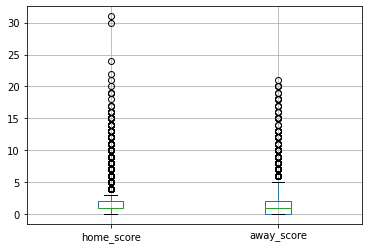

In [43]:
boxplot = df.boxplot(column=['home_score','away_score'])

# 7. Implementing the Solution

In [38]:
corr = df[['home_team','away_team','home_score','away_score','tournament']].corr()
corr

,home_score,away_score
home_score,1.000000,-0.133412
away_score,-0.133412,1.000000


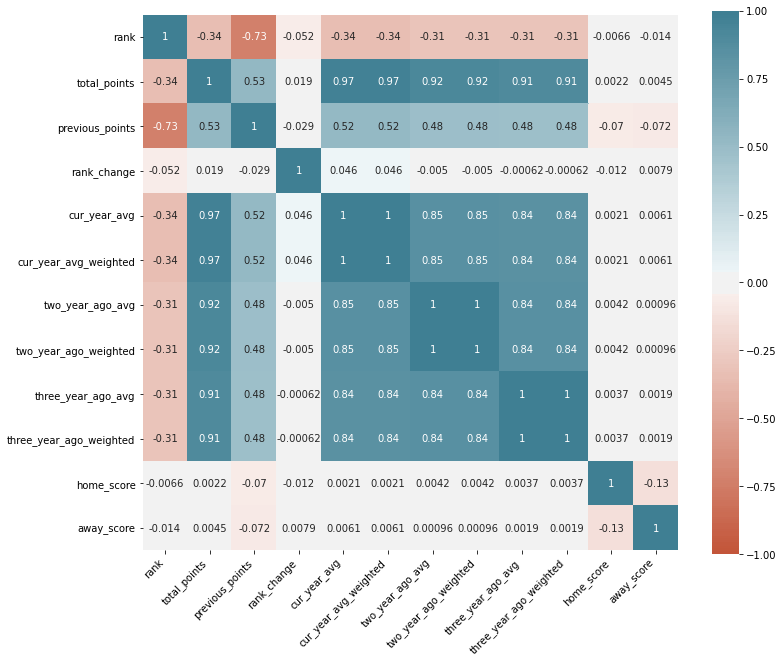

In [46]:
#checking collinearlity
plt.figure(figsize = (12,10))
corr = df.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True, annot = True 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

the ones close to 0 have less collinear while those at 1 are more collinear

In [18]:
#first we split the dataset into train and test sets.
# we will split the dataset such that we have the first 28,587 entries of our dataset as train and the rest 12,252 entries as test

train = df[:28587] 

# Drop all the indexes of the train data we created above from the main data set then store the remaining data in a variable called test
test = df.drop(train.index)

# Confirm that the train and test dataset have out desired length
print("train:" + str(len(train)))
print("test:"+ str(len(test)))


train:28587
test:29206


In [54]:
#lets train home
train_count=train['home_score'].value_counts()

# lets test home
test_count=test['home_score'].value_counts()

# Print out  train and test dataset
print(train_count)
print('*************************')
print(test_count)

1.0     8372
0.0     6554
2.0     6316
3.0     3490
4.0     1804
5.0      914
6.0      493
7.0      271
8.0      149
9.0       96
10.0      41
11.0      28
12.0      21
13.0      11
14.0       8
15.0       4
16.0       4
19.0       3
17.0       2
24.0       1
30.0       1
22.0       1
20.0       1
18.0       1
31.0       1
Name: home_score, dtype: int64
*************************
1.0     3701
0.0     3246
2.0     2723
3.0     1313
4.0      673
5.0      268
6.0      151
7.0       75
8.0       43
9.0       20
10.0      18
11.0       5
12.0       5
15.0       3
13.0       2
16.0       2
14.0       2
21.0       1
17.0       1
Name: home_score, dtype: int64


In [55]:
#lets train away team
train_count=train['away_score'].value_counts()

# lets test home
test_count=test['away_score'].value_counts()

# Print out  train and test dataset
print(train_count)
print('*************************')
print(test_count)

0.0     10281
1.0      9243
2.0      5063
3.0      2224
4.0       933
5.0       420
6.0       204
7.0        96
8.0        48
9.0        25
10.0       16
12.0        6
13.0        6
11.0        5
15.0        5
18.0        4
16.0        2
20.0        2
17.0        1
19.0        1
14.0        1
21.0        1
Name: away_score, dtype: int64
*************************
0.0     4853
1.0     3953
2.0     2029
3.0      829
4.0      331
5.0      110
6.0       65
7.0       37
8.0       18
9.0       11
10.0       4
17.0       2
12.0       2
15.0       1
16.0       1
11.0       1
19.0       1
18.0       1
20.0       1
14.0       1
13.0       1
Name: away_score, dtype: int64


In [34]:
#lets train tournment
train_count=train['tournament'].value_counts()

# lets test home
test_count=test['tournament'].value_counts()

# Print out  train and test dataset
print(train_count)
print('*************************')
print(test_count)

Friendly                                12427
FIFA World Cup qualification             4716
UEFA Euro qualification                  1549
African Cup of Nations qualification      995
FIFA World Cup                            708
                                        ...  
FIFI Wild Cup                              10
NAFU Championship                           7
Mundialito                                  7
Copa Félix Bogado                           6
Copa Ramón Castilla                         6
Name: tournament, Length: 88, dtype: int64
*************************
Friendly                                4484
FIFA World Cup qualification            2384
UEFA Euro qualification                  883
African Cup of Nations qualification     621
African Nations Championship             268
                                        ... 
Copa Paz del Chaco                         2
Gold Cup qualification                     2
AFF Championship qualification             2
Atlantic Heritage Cu

In [82]:
#defining X and y using the column locations
X = df.iloc[:, [0,3,4,7]]
y = df['away_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_pred = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# Let's describe our residual:
pd.DataFrame(residuals).describe()
print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The residual mean score for the model : ", residuals.mean())


ValueError: ignored

# 8. Challenging the solution

# 9. Follow up questions

a). Did we have the right data?

b). Do we need other data to answer our question?

c). Did we have the right question?